In [1]:
import pandas as pd 
import numpy as np
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import mplfinance as mpf
from sklearn import metrics


In [2]:
df = yf.download(tickers = "EURUSD=X",period = "20y",interval = "1d",group_by = 'ticker',
                 auto_adjust = True,prepost = True,threads = True,proxy = None)
df = pd.DataFrame(df)
df =df.drop(columns='Volume')
df =df.drop(columns='Open')
#df = df[:-22]
print(df)

[*********************100%***********************]  1 of 1 completed
                High       Low     Close
Date                                    
2003-12-01  1.204007  1.194401  1.196501
2003-12-02  1.210903  1.194600  1.208897
2003-12-03  1.213003  1.207700  1.212298
2003-12-04  1.214403  1.204398  1.208094
2003-12-05  1.219096  1.206593  1.218695
...              ...       ...       ...
2022-09-19  1.002808  0.996681  1.002235
2022-09-20  1.005025  0.995708  1.002959
2022-09-21  0.997407  0.986914  0.997079
2022-09-22  0.990619  0.981104  0.983072
2022-09-23  0.985610  0.974089  0.975705

[4881 rows x 3 columns]


In [3]:
df['High1'] = df['High'].shift(-1)
df['Low1'] = df['Low'].shift(-1)
df['Close1'] = df['Close'].shift(-1)

df['High2'] = df['High'].shift(-2)
df['Low2'] = df['Low'].shift(-2)
df['Close2'] = df['Close'].shift(-2)
'''
df['High3'] = df['High'].shift(-3)
df['Low3'] = df['Low'].shift(-3)
df['Close3'] = df['Close'].shift(-3)

df['High4'] = df['High'].shift(-4)
df['Low4'] = df['Low'].shift(-4)
df['Close4'] = df['Close'].shift(-4)

df['High5'] = df['High'].shift(-5)
df['Low5'] = df['Low'].shift(-5)
df['Close5'] = df['Close'].shift(-5)

df['High6'] = df['High'].shift(-6)
df['Low6'] = df['Low'].shift(-6)
df['Close6'] = df['Close'].shift(-6)
'''

df = df[:-2]
print(df)


                High       Low     Close     High1      Low1    Close1  \
Date                                                                     
2003-12-01  1.204007  1.194401  1.196501  1.210903  1.194600  1.208897   
2003-12-02  1.210903  1.194600  1.208897  1.213003  1.207700  1.212298   
2003-12-03  1.213003  1.207700  1.212298  1.214403  1.204398  1.208094   
2003-12-04  1.214403  1.204398  1.208094  1.219096  1.206593  1.218695   
2003-12-05  1.219096  1.206593  1.218695  1.224005  1.215407  1.222001   
...              ...       ...       ...       ...       ...       ...   
2022-09-15  1.001793  0.995748  0.998403  1.003563  0.994580  0.998831   
2022-09-16  1.003563  0.994580  0.998831  1.002808  0.996681  1.002235   
2022-09-19  1.002808  0.996681  1.002235  1.005025  0.995708  1.002959   
2022-09-20  1.005025  0.995708  1.002959  0.997407  0.986914  0.997079   
2022-09-21  0.997407  0.986914  0.997079  0.990619  0.981104  0.983072   

               High2      Low2    Clo

In [4]:
forecast_out = int(1)
df['Prediction'] = df['Close2'].shift(-forecast_out)
print(df) 

                High       Low     Close     High1      Low1    Close1  \
Date                                                                     
2003-12-01  1.204007  1.194401  1.196501  1.210903  1.194600  1.208897   
2003-12-02  1.210903  1.194600  1.208897  1.213003  1.207700  1.212298   
2003-12-03  1.213003  1.207700  1.212298  1.214403  1.204398  1.208094   
2003-12-04  1.214403  1.204398  1.208094  1.219096  1.206593  1.218695   
2003-12-05  1.219096  1.206593  1.218695  1.224005  1.215407  1.222001   
...              ...       ...       ...       ...       ...       ...   
2022-09-15  1.001793  0.995748  0.998403  1.003563  0.994580  0.998831   
2022-09-16  1.003563  0.994580  0.998831  1.002808  0.996681  1.002235   
2022-09-19  1.002808  0.996681  1.002235  1.005025  0.995708  1.002959   
2022-09-20  1.005025  0.995708  1.002959  0.997407  0.986914  0.997079   
2022-09-21  0.997407  0.986914  0.997079  0.990619  0.981104  0.983072   

               High2      Low2    Clo

In [5]:
X = pd.DataFrame(df.drop(columns='Prediction'))
#X = preprocessing.scale(X)
X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

df = df[:-forecast_out]

print(df)


                High       Low     Close     High1      Low1    Close1  \
Date                                                                     
2003-12-01  1.204007  1.194401  1.196501  1.210903  1.194600  1.208897   
2003-12-02  1.210903  1.194600  1.208897  1.213003  1.207700  1.212298   
2003-12-03  1.213003  1.207700  1.212298  1.214403  1.204398  1.208094   
2003-12-04  1.214403  1.204398  1.208094  1.219096  1.206593  1.218695   
2003-12-05  1.219096  1.206593  1.218695  1.224005  1.215407  1.222001   
...              ...       ...       ...       ...       ...       ...   
2022-09-14  1.002275  0.996363  0.998203  1.001793  0.995748  0.998403   
2022-09-15  1.001793  0.995748  0.998403  1.003563  0.994580  0.998831   
2022-09-16  1.003563  0.994580  0.998831  1.002808  0.996681  1.002235   
2022-09-19  1.002808  0.996681  1.002235  1.005025  0.995708  1.002959   
2022-09-20  1.005025  0.995708  1.002959  0.997407  0.986914  0.997079   

               High2      Low2    Clo

In [6]:
features = X.shape[1]
print( features)

test_point = np.round(len(df)*0.1)
test_index = int(len(df)-test_point)

train = df.iloc[:test_index]
test = df.iloc[test_index:]

X_train, Y_train = train.iloc[:, :-1], pd.DataFrame(train.iloc[:, -1])
X_test, Y_test = test.iloc[:, :-1], pd.DataFrame(test.iloc[:, -1])



9


In [7]:
length = 1

trainX = np.array([X_train], order='C')
trainX.resize((X_train.shape[0], length, features))
testX = np.array([X_test], order='C')
testX.resize((X_test.shape[0], length, features))

forecastX = np.array([X_forecast], order='C')
forecastX.resize((X_forecast.shape[0], length, features))


In [8]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model = Sequential()
model.add(LSTM(features, input_shape=(length,features), activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')
model.fit(trainX, Y_train,
          epochs=100,
          batch_size=20, 
          validation_data=(testX, Y_test),
          callbacks=[early_stop]
          )

Epoch 1/100
220/220 [==============================] - 2s 3ms/step - loss: 0.1149 - val_loss: 0.0027
Epoch 2/100
220/220 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0026
Epoch 3/100
220/220 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 4/100
220/220 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 5/100
220/220 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 6/100
220/220 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 7/100
220/220 [==============================] - 0s 2ms/step - loss: 9.6804e-04 - val_loss: 8.2565e-04
Epoch 8/100
220/220 [==============================] - 0s 2ms/step - loss: 7.3643e-04 - val_loss: 7.6660e-04
Epoch 9/100
220/220 [==============================] - 0s 2ms/step - loss: 5.5047e-04 - val_loss: 3.0542e-04
Epoch 10/100
220/220 [==============================] - 0s 2ms/step

<AxesSubplot:>

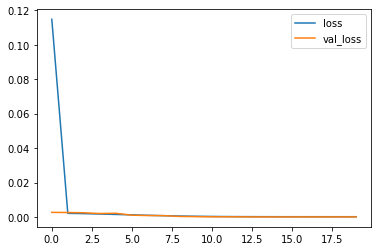

In [9]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [10]:
trainpredictions = model.predict(trainX)
testpredictions = model.predict(testX)

16/16 [==============================] - 0s 2ms/step


In [11]:
print('R2 Score is: ', metrics.explained_variance_score(Y_test, testpredictions))
print('Root Mean Squared Error is: ', np.sqrt(metrics.mean_squared_error(Y_test, testpredictions)))
print('Mean Absolute Error is: ', metrics.mean_absolute_error(Y_test, testpredictions))
print('Mean Absolute Percentage Error is: ', metrics.mean_absolute_percentage_error(Y_test, testpredictions))

R2 Score is:  0.9939403071636362
Root Mean Squared Error is:  0.005548951935391213
Mean Absolute Error is:  0.004138452474211083
Mean Absolute Percentage Error is:  0.0037040522187990026


In [12]:
forecast_prediction = model.predict(forecastX)
print(forecast_prediction)

1/1 [==============================] - 0s 32ms/step
[[0.98693]]


Max = [0.98693]
Min = [0.98693]


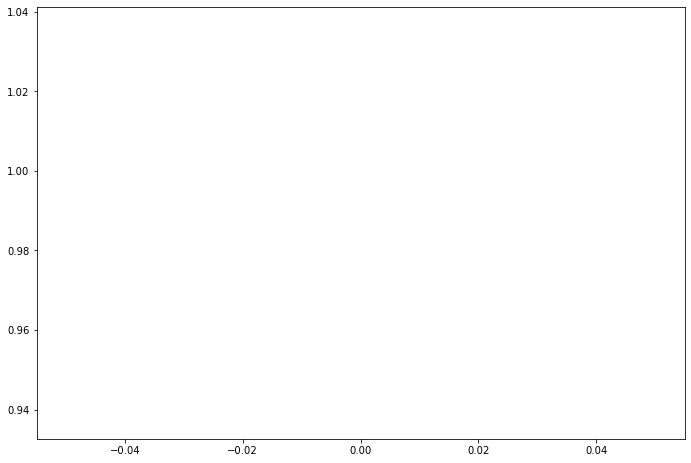

In [13]:
print('Max =',max(forecast_prediction))
print('Min =',min(forecast_prediction))
plt.axes([1, 2, 1.5 , 1.5])
plt.plot(forecast_prediction)